In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.float_format = '${:,.2f}'.format

from sklearn.datasets import load_boston
dataset = load_boston()
print(dataset.data)
print(dataset.feature_names)
print(dataset.DESCR)
print(dataset.target)
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()
#You would also want to add the prices of the houses to the DataFrame, so 
#let’s add a new column to the DataFrame and call it MEDV:
df['MEDV'] = dataset.target
df.head()
df.info()
df.isnull().sum()
# replace all the NaNs in column Missedleads with the average of column 
df.CRIM = df.CRIM.fillna(df.CRIM.mean())
#drop the rows that are Nan in soem other columns
df = df.dropna()                             # drop all rows with NaN
df = df.reset_index(drop=True)                 # reset the index
print(df)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
     CRIM     ZN  INDUS  CHAS   NOX  ...     TAX  PTRATIO       B  LSTAT   MEDV
0   $0.01 $18.00  $2.31 $0.00 $0.54  ... $296.00   $15.30 $396.90  $4.98 $24.00
1   $0.03  $0.00  $7.07 $0.00 $0.47  ... $242.00   $17.80 $396.90  $9.14 $21.60
2   $

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Feature Selection**

In [ ]:
#--- Feature Selection
#--- Correlations
corr = df.corr()
print(corr)
#--- get the top 3 features that has the highest correlation
print(df.corr().abs().nlargest(3,'MEDV').index)
#--- print the top 3 correlation values---
print(df.corr().abs().nlargest(3,'MEDV').values[:,13])

          CRIM     ZN  INDUS   CHAS    NOX  ...    TAX  PTRATIO      B  LSTAT   MEDV
CRIM     $1.00 $-0.20  $0.41 $-0.06  $0.42  ...  $0.58    $0.29 $-0.39  $0.46 $-0.39
ZN      $-0.20  $1.00 $-0.53 $-0.04 $-0.52  ... $-0.31   $-0.39  $0.18 $-0.41  $0.36
INDUS    $0.41 $-0.53  $1.00  $0.06  $0.76  ...  $0.72    $0.38 $-0.36  $0.60 $-0.48
CHAS    $-0.06 $-0.04  $0.06  $1.00  $0.09  ... $-0.04   $-0.12  $0.05 $-0.05  $0.18
NOX      $0.42 $-0.52  $0.76  $0.09  $1.00  ...  $0.67    $0.19 $-0.38  $0.59 $-0.43
RM      $-0.22  $0.31 $-0.39  $0.09 $-0.30  ... $-0.29   $-0.36  $0.13 $-0.61  $0.70
AGE      $0.35 $-0.57  $0.64  $0.09  $0.73  ...  $0.51    $0.26 $-0.27  $0.60 $-0.38
DIS     $-0.38  $0.66 $-0.71 $-0.10 $-0.77  ... $-0.53   $-0.23  $0.29 $-0.50  $0.25
RAD      $0.63 $-0.31  $0.60 $-0.01  $0.61  ...  $0.91    $0.46 $-0.44  $0.49 $-0.38
TAX      $0.58 $-0.31  $0.72 $-0.04  $0.67  ...  $1.00    $0.46 $-0.44  $0.54 $-0.47
PTRATIO  $0.29 $-0.39  $0.38 $-0.12  $0.19  ...  $0.46    $1.00 $

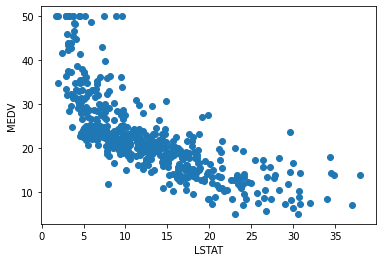

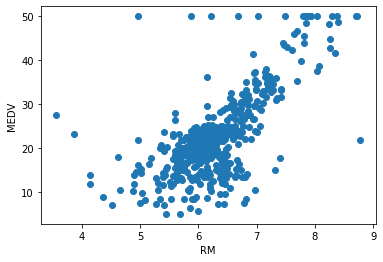

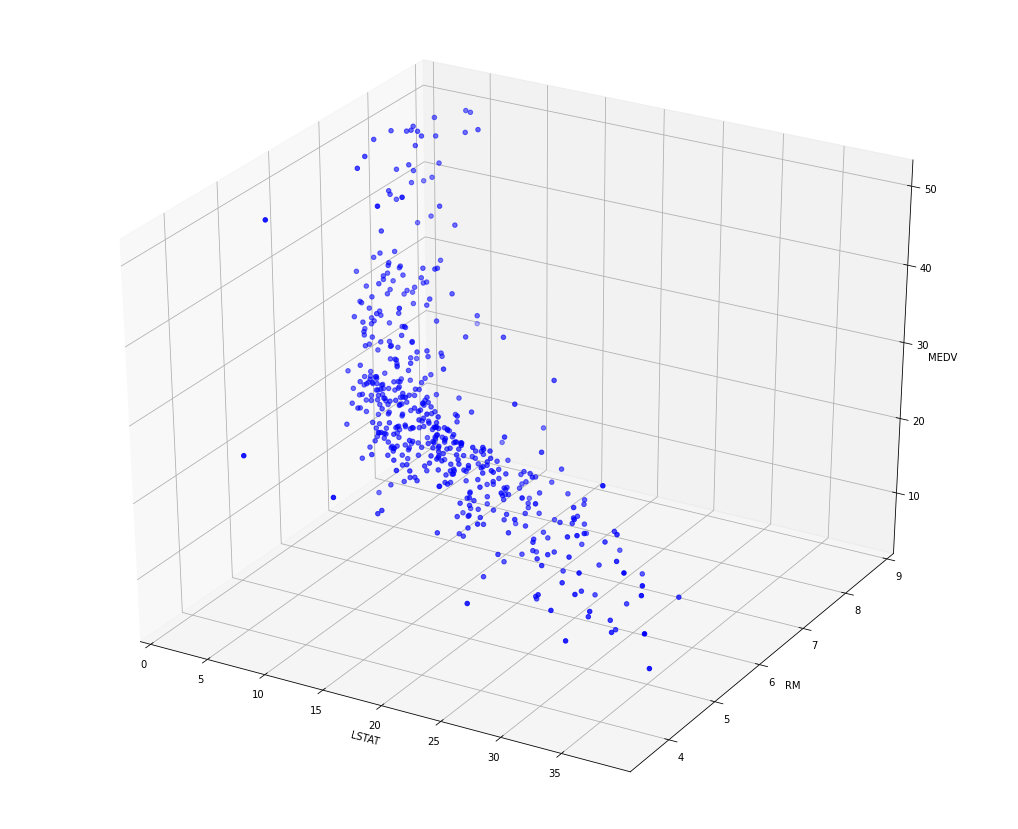

In [ ]:
plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()
plt.scatter(df['RM'], df['MEDV'], marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()
 
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(df['LSTAT'],
           df['RM'],
           df['MEDV'],
           c='b')
 
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

x      LSTAT    RM
0    $4.98 $6.58
1    $9.14 $6.42
2    $4.03 $7.18
3    $2.94 $7.00
4    $5.33 $7.15
..     ...   ...
501  $9.67 $6.59
502  $9.08 $6.12
503  $5.64 $6.98
504  $6.48 $6.79
505  $7.88 $6.03

[506 rows x 2 columns]
R-Squared: 0.6162
intercept 0.38437936780346504
coeficinets [-0.65957972  4.83197581]
[4.75686695]
36.49422110915324


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

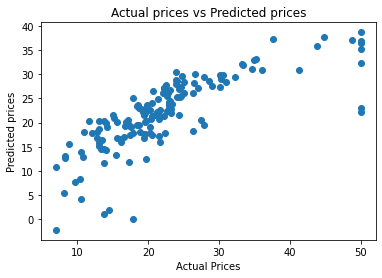

In [ ]:
#--- Training Model
Y = df['MEDV']
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
print("x",x)

'''headers = ['LSTAT','RM']
x2=pd.concat([df['LSTAT'],df['RM']],axis=1,keys=headers)
print("x2",x2)'''

#We will split the dataset into 70 percent for training and 30 percent for testing:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,random_state=5)

from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(x_train, Y_train)
Y_predict = model.predict(x_test)
print('R-Squared: %.4f' % model.score(x_test,Y_test))
print('intercept',model.intercept_)
print('coeficinets', model.coef_)


#We can use the model to make a prediction for the house price when LSTAT is 30 and RM is 5:
print(model.predict([[30,5]]))

#We will also plot a scatter plot showing the actual price vs. the predicted price:
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(Y_test, Y_predict)
print(mse)

#--- Ideally, it should be a straight line
plt.scatter(Y_test, Y_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

**Plotting the 3D Hyperplane**

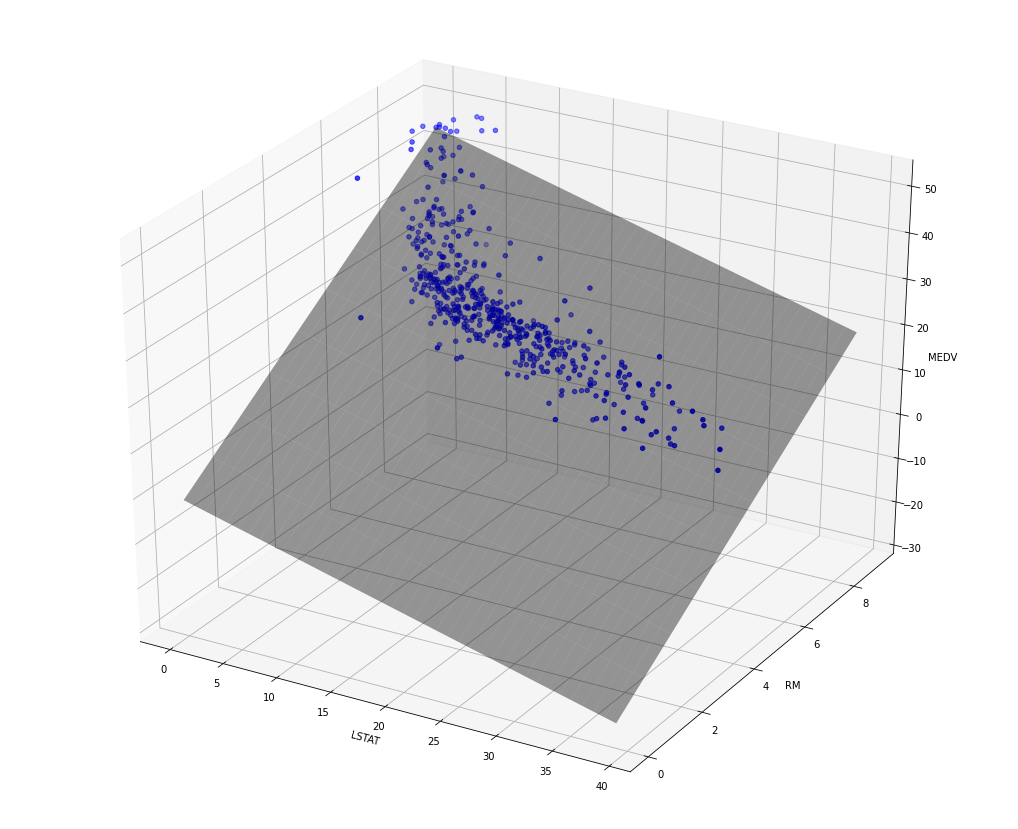

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
 
from sklearn.datasets import load_boston
dataset = load_boston()
 
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
 
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
 
#---create a meshgrid of all the values for LSTAT and RM---
x_surf= np.arange(0, 40, 1)   #---for LSTAT---
y_surf= np.arange(0, 10, 1)   #---for RM---
x_surf,y_surf = np.meshgrid(x_surf, y_surf)
 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)
 
#---calculate z(MEDC) based on the model---
z= lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)
 
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
 
plt.show()

**Using Polynomial Multiple Regression on the Boston Dataset**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
 
dataset = load_boston()
 
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
 
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,random_state=5)

#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_train_poly = polynomial_features.fit_transform(x_train)

#---print out the formula---
print(polynomial_features.get_feature_names(['x','y']))
model = LinearRegression()
model.fit(x_train_poly, Y_train)
x_test_poly = polynomial_features.fit_transform(x_test)
print('R-Squared: %.4f' % model.score(x_test_poly,Y_test))
print(model.intercept_)
print(model.coef_)

['1', 'x', 'y', 'x^2', 'x y', 'y^2']


**Plotting the 3D Hyperplane**

['1', 'x', 'y', 'x^2', 'x y', 'y^2']


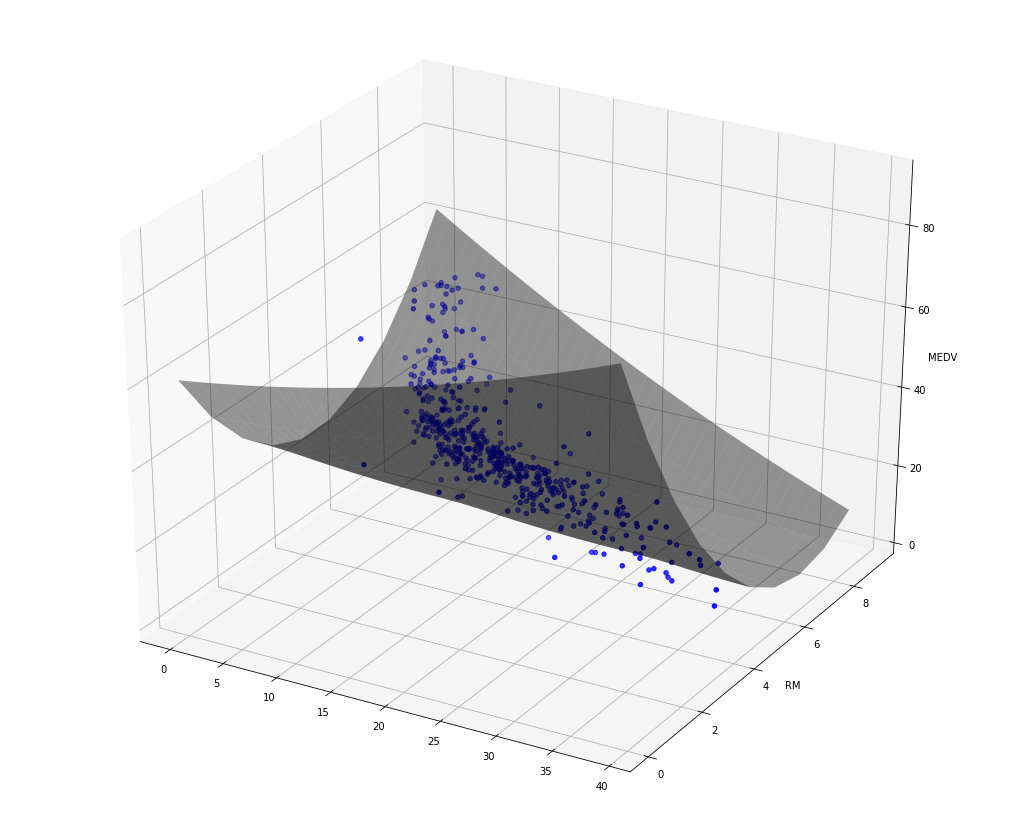

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
 
dataset = load_boston()
 
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
 
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
 
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
 
#---create a meshgrid of all the values for LSTAT and RM---
x_surf= np.arange(0, 40, 1)   #---for LSTAT---
y_surf= np.arange(0, 10, 1)   #---for RM---
x_surf,y_surf = np.meshgrid(x_surf, y_surf)
 
#---use a polynomial function of degree 2---
degree= 2
polynomial_features= PolynomialFeatures(degree = degree)
x_poly = polynomial_features.fit_transform(x)
print(polynomial_features.get_feature_names(['x','y']))
 
#---apply linear regression---
model= LinearRegression()
model.fit(x_poly, Y)
 
#---calculate z(MEDC) based on the model---
z= lambda x,y: (model.intercept_ +
                (model.coef_[1] * x) +
                (model.coef_[2] * y) +
                (model.coef_[3] * x**2) +
                (model.coef_[4] * x*y) +
                (model.coef_[5] * y**2))
 
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
 
plt.show()

[0.001  0.0011 0.0012 ... 0.9987 0.9988 0.9989]
[-6.90675478 -6.81134449 -6.724233   ...  6.64409017  6.724233
  6.81134449]


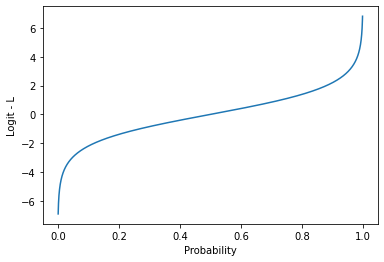

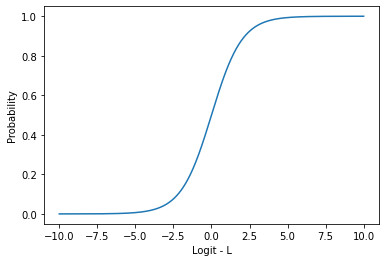

In [ ]:
# Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
def logit(x):
    return np.log( x / (1 - x) )
 
x = np.arange(0.001,0.999, 0.0001)
#y = [logit(n) for n in x]
y=logit(x)
print(x)
print(y)
plt.plot(x,y)
plt.xlabel("Probability")
plt.ylabel("Logit - L")
plt.show()
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
 
x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.plot(x,y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")
plt.show()

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
.. _breast_cancer_dataset:

Breast ca

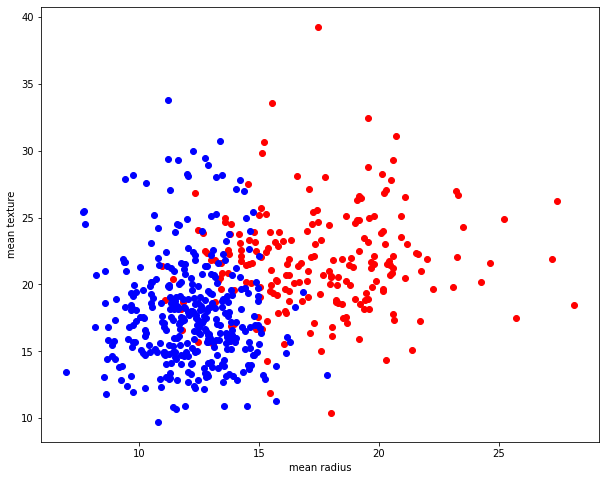

In [ ]:
#Breast Cancer Data

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data)
print(cancer.feature_names)
print(cancer.DESCR)
print(cancer.target)
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()
df.info()
df.isnull().sum()
#---copy from dataset into a 2-d list---
X= []
for target in range(2):
    X.append([[], []])
    for i in range(len(cancer.data)):              # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture
 
colours = ("r", "b")   # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               c=colours[target])
 
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

[15.120902]
[[-1.02475609]]
[15.120902]
[[-1.02475609]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5

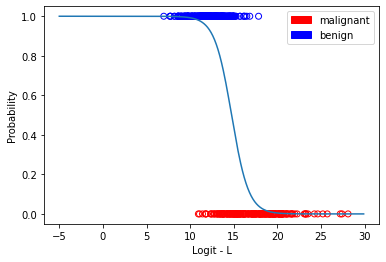

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
 
from sklearn.datasets import load_breast_cancer
 
cancer = load_breast_cancer()   # Load dataset
x = cancer.data[:,0]            # mean radius is the first column
y = cancer.target               # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'}    # 0: malignant, 1: benign
 
plt.scatter(x,y,
            facecolors='none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),cmap=colors)
 
plt.xlabel("mean radius")
plt.ylabel("Result")
 
red   = mpatches.Patch(color='red',   label='malignant')
blue  = mpatches.Patch(color='blue',  label='benign')
 
plt.legend(handles=[red, blue], loc=1)

import numpy as np
from sklearn import linear_model
log_regress = linear_model.LogisticRegression()
 
#---train the model---
log_regress.fit(X= np.array(x).reshape(len(x),1),y = y)
 
#---print trained model intercept---
print(log_regress.intercept_)     # [ 8.19393897]
 
#---print trained model coefficients---
print(log_regress.coef_)          # [[-0.54291739]]

#---print trained model intercept---
b0=log_regress.intercept_
print(b0)     # [ 8.19393897]
 
#---print trained model coefficients---
b1=log_regress.coef_
print(b1)          # [[-0.54291739]]

xTrue=np.arange(-5,30,0.1)
print(type(xTrue))
yPlot=1/(1+np.exp(-1*(b0+b1*xTrue)))
yPlot=np.reshape(yPlot,xTrue.shape)
print(type(yPlot))
print(xTrue)
print(yPlot)
plt.plot(xTrue,yPlot)
plt.xlabel("Logit - L")
plt.ylabel("Probability")
plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[-2.80064304]
[[1.96344788]]
110
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


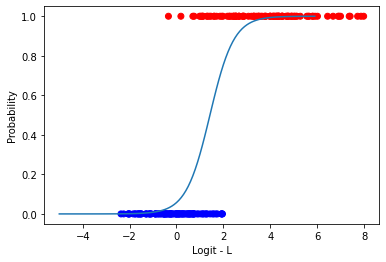

Accuaracy %.4f 0.9333333333333333


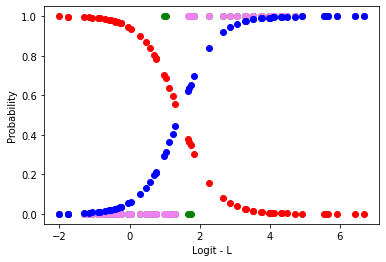

In [ ]:
import random
import pandas as pd
import numpy as np


nums_1=[]
nums_2=[]
n=10
mu_1, sigma_1 = 0, 1 # mean and standard deviation
nums_1 = pd.DataFrame(np.random.normal(mu_1, sigma_1, [n,1]),columns=['data'])

mu_2, sigma_2 = 4, 2 # mean and standard deviation
nums_2 = pd.DataFrame(np.random.normal(mu_2, sigma_2, [n,1]),columns=['data'])
X1=pd.DataFrame(np.zeros([len(nums_1),1]),columns=['labels'])
X2=pd.DataFrame(np.ones([len(nums_2),1]),columns=['labels'])
allSet1=pd.concat([nums_1,X1],axis=1, sort=False)
allSet2=pd.concat([nums_2,X2],axis=1, sort=False)
allData=pd.concat([allSet1, allSet2], axis=0, sort=False,ignore_index=True)
#print(allData)
#result = pd.concat(allData)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x = allData['data']
y = allData['labels']
colors = {0:'red', 1:'blue'}
 
plt.scatter(x,y,c=y,cmap='bwr')

#We will split the dataset into 70 percent for training and 30 percent for testing:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3,random_state=5)

from sklearn import linear_model
log_regress = linear_model.LogisticRegression()
 
#---train the model---
log_regress.fit(X= np.array(x).reshape(len(x),1),y = y)
print(log_regress)
#---print trained model intercept---
b0=log_regress.intercept_
print(b0)     # [ 8.19393897]
 
#---print trained model coefficients---
b1=log_regress.coef_
print(b1)          # [[-0.54291739]]

xTrue=np.arange(-5,6,0.1)
xTrue=np.reshape(xTrupe,(len(xTrue),1))
print(type(xTrue))
yPlot=1/(1+np.exp(-1*(b0+b1*xTrue)))
yPlot=np.reshape(yPlot,xTrue.shape)
print(type(yPlot))
#print(xTrue)
#print(yPlot)
plt.plot(xTrue,yPlot)
plt.xlabel("Logit - L")
plt.ylabel("Probability")
plt.show()
Y_predict = log_regress.predict_proba(x_test)
print('R-Squared: %.4f' % model.score(x_test,Y_test))
#plt.plot(x_test,y_test,"r")
plt.plot(x_test,Y_predict,"b")
plt.xlabel("Logit - L")
plt.ylabel("Probability")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
print(X)
print(y)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334